In [38]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [39]:
rng = np.random.default_rng()
freq = rng.uniform(1,3, size = 300)
phase = rng.uniform(0, 2*np.pi,size = 300)
t = np.linspace(0,3*np.pi,50)
noise = rng.normal(size = (300,50))
signals = np.sin(freq.reshape(-1,1) * t + phase.reshape(-1,1))
print(signals.shape)

(300, 50)


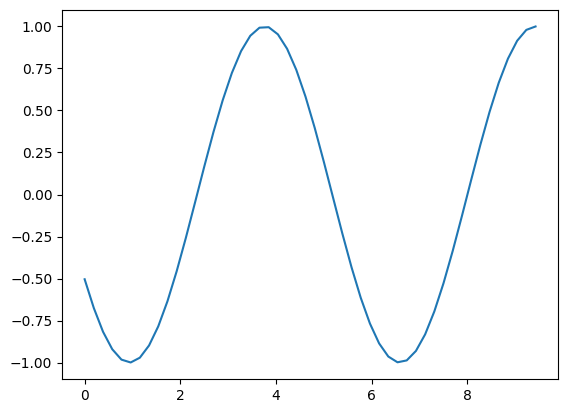

In [40]:
plt.plot(t, signals[0])

In [45]:
class AutoencoderMLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(in_features=50, out_features=64),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.25),
            torch.nn.Linear(in_features=64, out_features=32),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.25),
            torch.nn.Linear(in_features=32, out_features= 16),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.25),
            torch.nn.Linear(in_features=16, out_features= 2)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(in_features=2, out_features=16),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=16, out_features=32),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=32, out_features=64),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=64, out_features=50)
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [46]:
model = AutoencoderMLP()
x_train = torch.from_numpy(signals).float()
model(x_train)

tensor([[ 0.0032,  0.0454, -0.0196,  ..., -0.0529, -0.1392,  0.1888],
        [ 0.0039,  0.0451, -0.0198,  ..., -0.0530, -0.1392,  0.1883],
        [ 0.0047,  0.0448, -0.0200,  ..., -0.0534, -0.1394,  0.1876],
        ...,
        [ 0.0036,  0.0452, -0.0195,  ..., -0.0528, -0.1396,  0.1889],
        [ 0.0045,  0.0449, -0.0194,  ..., -0.0530, -0.1400,  0.1887],
        [ 0.0055,  0.0444, -0.0204,  ..., -0.0539, -0.1394,  0.1867]],
       grad_fn=<AddmmBackward0>)

In [47]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
citerion = torch.nn.MSELoss()
hist = []

In [48]:
for i in range(10):
    pred = model(x_train)
    loss = citerion(pred, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    hist.append(loss.item())
    print(loss.item())

0.5064688920974731
0.5010053515434265
0.498458594083786
0.497194766998291
0.4954775273799896
0.49263882637023926
0.4854041039943695
0.4750661551952362
0.45945051312446594
0.4573621153831482


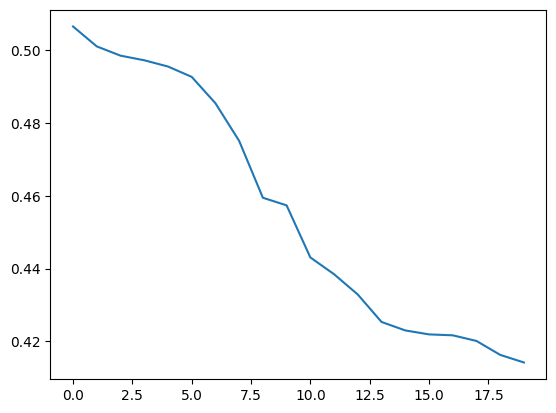

In [50]:
plt.plot(hist)

In [55]:
for i in range(100):
    pred = model(x_train)
    loss = citerion(pred, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    hist.append(loss.item())
    print(loss.item())

0.13450166583061218
0.13897152245044708
0.13185875117778778
0.14546912908554077
0.13412481546401978
0.1316928118467331
0.13711145520210266
0.12698262929916382
0.127229705452919
0.12938424944877625
0.12818315625190735
0.1385788470506668
0.12572617828845978
0.13282525539398193
0.12896746397018433
0.1317167431116104
0.12826687097549438
0.12371055036783218
0.12942267954349518
0.1297157108783722
0.13432185351848602
0.1301780343055725
0.1229562908411026
0.12100715935230255
0.13007116317749023
0.1236429214477539
0.13204233348369598
0.12343189865350723
0.14419716596603394
0.1230810210108757
0.1323722004890442
0.13333480060100555
0.12499214708805084
0.12790557742118835
0.12306350469589233
0.1239447221159935
0.12151694297790527
0.12227916717529297
0.13146774470806122
0.1165873184800148
0.12328259646892548
0.1259341835975647
0.12636540830135345
0.12592461705207825
0.12035919725894928
0.12818662822246552
0.12477102875709534
0.12246641516685486
0.12495274841785431
0.11510547995567322
0.117904625833

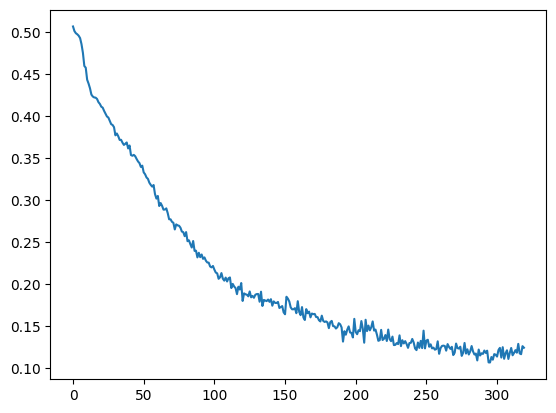

In [56]:
plt.plot(hist)

In [58]:
print(model(x_train[0,:].reshape(1,50)).detach().numpy().shape)

(1, 50)


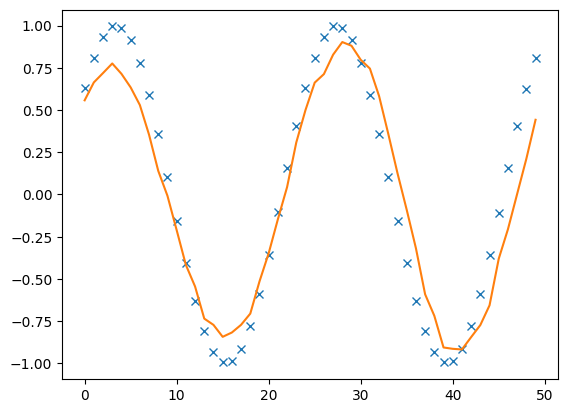

In [63]:
model.eval()
idx = rng.integers(0,300)
plt.plot(x_train[idx,:], 'x')
plt.plot(model(x_train[idx,:].reshape(1,50)).detach().numpy().reshape(50))

In [64]:
model.encoder(x_train[idx,:].reshape(1,50)).detach().numpy()

array([[-2.2148144, 49.323097 ]], dtype=float32)